Using device: cuda
Files already downloaded and verified
Model loaded successfully from ./model/net_197.pth


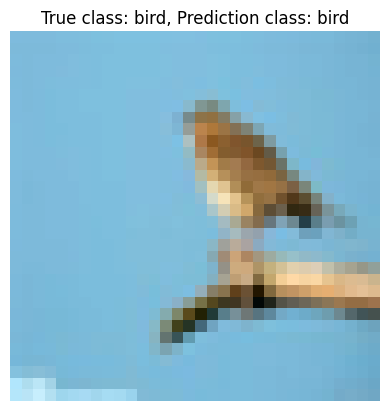

In [1]:
import os
import torch
import random
import matplotlib.pyplot as plt
import torchvision.transforms as transforms
from torchvision.datasets import CIFAR10
from resnet import ResNet18  # 确保 ResNet18 定义在 resnet.py 文件中

# 定义设备
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print(f"Using device: {device}")

# 定义数据集的预处理（与训练时保持一致）
transform_test = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.4914, 0.4822, 0.4465), (0.2023, 0.1994, 0.2010))
])

# 加载测试数据集
testset = CIFAR10(root='./data', train=False, download=True, transform=transform_test)

# CIFAR-10 类别
classes = ('plane', 'car', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck')

# 加载模型
model_path = './model/net_197.pth'
if not os.path.exists(model_path):
    raise FileNotFoundError(f"Model file not found: {model_path}")

model = ResNet18().to(device)
try:
    model.load_state_dict(torch.load(model_path, map_location=device))
    model.eval()  # 设置为评估模式
    print(f"Model loaded successfully from {model_path}")
except Exception as e:
    print(f"Error loading model: {e}")
    exit()

# 随机选择一张测试图像
index = random.randint(0, len(testset) - 1)
image, true_label = testset[index]

# 数据需要扩展一个批次维度，并移动到设备上
image = image.unsqueeze(0).to(device)

# 进行预测
with torch.no_grad():
    output = model(image)
    _, predicted_label = torch.max(output, 1)

# 将图像数据转换回原始格式（取消归一化）
unnormalize = transforms.Normalize(
    mean=[-0.4914 / 0.2023, -0.4822 / 0.1994, -0.4465 / 0.2010],
    std=[1 / 0.2023, 1 / 0.1994, 1 / 0.2010]
)
image = unnormalize(image.squeeze(0).cpu()).numpy().transpose((1, 2, 0))
image = (image - image.min()) / (image.max() - image.min())  # 将像素值归一化到 [0, 1]

# 显示图像及其预测结果
plt.imshow(image)
plt.title(f"True class: {classes[true_label]}, Prediction class: {classes[predicted_label.item()]}")
plt.axis('off')
plt.show()